In [710]:
import numpy as np
import matplotlib.pyplot as plt

In [711]:
class Random2DGaussian:

    minx = 0
    maxx = 10
    miny = 0
    maxy = 10
    scalecov = 5

    def __init__(self):

        self.mean = np.array([np.random.uniform(self.minx, self.maxx), np.random.uniform(self.miny, self.maxy)])

        D = np.random.random_sample(2)
        D *= ((self.maxx - self.minx) / self.scalecov, (self.maxy - self.miny) / self.scalecov)
        D **= 2
        D = np.diag(D)
        
        phi = np.random.uniform(0, 2 * np.pi)
        R = np.array([[np.cos(phi), -np.sin(phi)], [np.sin(phi), np.cos(phi)]])
                
        self.cov = R.T @ D @ R

    def get_sample(self, n_samples):
        return np.random.multivariate_normal(self.mean, self.cov, size=n_samples)



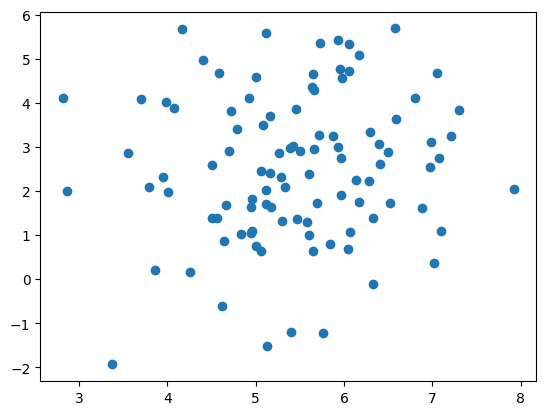

In [712]:
np.random.seed(100)
G = Random2DGaussian()
X = G.get_sample(100)
plt.scatter(X[:, 0], X[:, 1])
plt.show()


In [713]:
import sys


def binlogreg_train(X,y):

    w = np.random.randn(X.shape[1], 1)
    b = 0

    param_niter = 300

    for i in range(param_niter):
        scores = np.dot(X,w) + b
        probs = 1 / (1 + np.exp(-scores))
        loss = -np.mean(y * np.log(probs) + (1 - y) * np.log(1 - probs))

        if i % 10 == 0:
            print(f"Iter {i}; Loss {loss}")

        dL_dscores = probs - y
        grad_w = 1/X.shape[0] * np.dot(X.T, dL_dscores)
        grad_b = np.mean(dL_dscores)
        
        w -= 0.05 * grad_w
        b -= 0.05 * grad_b

    return w,b

def binlogreg_classify(X,w,b):
    res = X @ w + b
    res = 1 / (1+np.exp(-res))
    return res.flatten()

In [714]:
def sample_gauss_2d(C, N):
    gaussians = [Random2DGaussian() for _ in range(C)]
    X = [gaussian.get_sample(N) for gaussian in gaussians]
    y = [np.full(N,i) for i in range(C)]

    X = np.vstack(X)
    y = np.vstack(y)

    return X,y

In [715]:
def eval_perf_binary(Y,Y_):
    tp = sum(y == 1 and y_ == 1 for y, y_ in zip(Y, Y_))
    tn = sum(y == 0 and y_ == 0 for y, y_ in zip(Y, Y_))
    fp = sum(y == 1 and y_ == 0 for y, y_ in zip(Y, Y_))
    fn = sum(y == 0 and y_ == 1 for y, y_ in zip(Y, Y_))

    acc = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
    p = tp / (tp + fp) if (tp + fp) > 0 else 0
    r = tp / (tp + fn) if (tp + fn) > 0 else 0

    return acc,p,r


def eval_AP(ranked_labels):
  n = len(ranked_labels)
  pos = sum(ranked_labels)
  neg = n - pos
  
  tp = pos
  tn = 0
  fn = 0
  fp = neg
  
  sumprec=0

  for x in ranked_labels:
    precision = tp / (tp + fp) if (tp + fn) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0

    if x:
      sumprec += precision
      
    tp -= x
    fn += x
    fp -= not x
    tn += not x

  return sumprec/pos



In [716]:
eval_AP([0,0,0,1,1,1])

1.0

In [717]:
np.random.seed(100)

X,Y_ = sample_gauss_2d(2, 100)
Y_ = Y_.flatten().reshape(-1,1)
# train the model
w,b = binlogreg_train(X, Y_)

# evaluate the model on the training dataset
probs = binlogreg_classify(X, w,b)
Y = probs >= 0.5
Y = Y.astype(int).flatten() #maybe
#print(Y)
# report performance
accuracy, recall, precision = eval_perf_binary(Y, Y_)
Y_ = Y_.flatten()
#print(probs)
AP = eval_AP(Y_[probs.argsort()])
print (accuracy, recall, precision, AP)

Iter 0; Loss 1.3109121150318759
Iter 10; Loss 0.30735836359142593
Iter 20; Loss 0.1445307572182148
Iter 30; Loss 0.09455961065920677
Iter 40; Loss 0.07973253508937556
Iter 50; Loss 0.07592625943607095
Iter 60; Loss 0.07498386898639794
Iter 70; Loss 0.07469735904080022
Iter 80; Loss 0.07455394776853137
Iter 90; Loss 0.07444254083594917
Iter 100; Loss 0.0743396878782934
Iter 110; Loss 0.07424043695772257
Iter 120; Loss 0.07414369572345683
Iter 130; Loss 0.07404917694958936
Iter 140; Loss 0.07395676365071542
Iter 150; Loss 0.07386637692626573
Iter 160; Loss 0.07377794826936852
Iter 170; Loss 0.07369141364060126
Iter 180; Loss 0.07360671209819586
Iter 190; Loss 0.07352378539199439
Iter 200; Loss 0.07344257776789691
Iter 210; Loss 0.07336303582384512
Iter 220; Loss 0.07328510838327221
Iter 230; Loss 0.0732087463783229
Iter 240; Loss 0.07313390274076564
Iter 250; Loss 0.07306053229974784
Iter 260; Loss 0.07298859168583942
Iter 270; Loss 0.07291803924090332
Iter 280; Loss 0.07284883493337832


In [718]:
from math import e


def graph_data(X, Y_, Y):
    correct = np.where(Y_ == Y)[0]
    incorrect = np.where(Y_ != Y)[0]
    
    colors = np.tile([0.0, 0.0, 0.0], (Y_.shape[0],1))
    palette = np.array([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
    for i in range(3):
        colors[Y_ == i] = palette[i]

    plt.scatter(X[correct, 0], X[correct, 1], c=colors[correct],s=20, edgecolors='black', marker='o')
    plt.scatter(X[incorrect, 0], X[incorrect, 1], c=colors[incorrect], marker='x',s=20, edgecolors='black')

    #plt.legend()
    #plt.show()

In [719]:
def myDummyDecision(X):
    scores = X[:,0] + X[:,1] - 5
    return scores

C:\Users\Ivan\AppData\Local\Temp\ipykernel_25092\3980335596.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[incorrect, 0], X[incorrect, 1], c=colors[incorrect], marker='x',s=20, edgecolors='black')


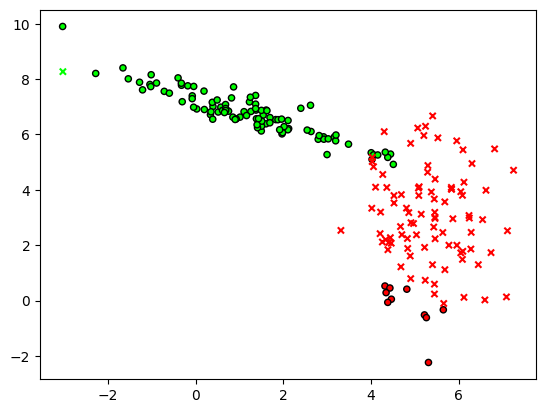

In [720]:
np.random.seed(100)

# get the training dataset
X,Y_ = sample_gauss_2d(2, 100)
Y_ = Y_.flatten()
# get the class predictions
Y = myDummyDecision(X)>0.5

# graph the data points
graph_data(X, Y_, Y) 

# show the results
plt.show()

In [721]:
def graph_surface(fun, rect, offset=0.5, width=256, height=256):
    x_span = np.linspace(rect[0][0], rect[1][0], width) # improper graphing without +3. Why?
    y_span = np.linspace(rect[0][1], rect[1][1], height)
    x_mesh, y_mesh = np.meshgrid(x_span, y_span)
    grid = np.stack((x_mesh.flatten(), y_mesh.flatten()), axis=1)
    z_values = fun(grid).reshape((width, height))
    delta = offset if offset else 0
    maxval = max(np.max(z_values)-delta, -(np.min(z_values)-delta))
    plt.pcolormesh(x_mesh, y_mesh, z_values, vmin=delta-maxval, vmax=delta+maxval)

    if offset != None:
        plt.contour(x_mesh, y_mesh, z_values, colors='black', levels=[offset])
    #plt.colorbar()
    #plt.show()


C:\Users\Ivan\AppData\Local\Temp\ipykernel_25092\3980335596.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[incorrect, 0], X[incorrect, 1], c=colors[incorrect], marker='x',s=20, edgecolors='black')


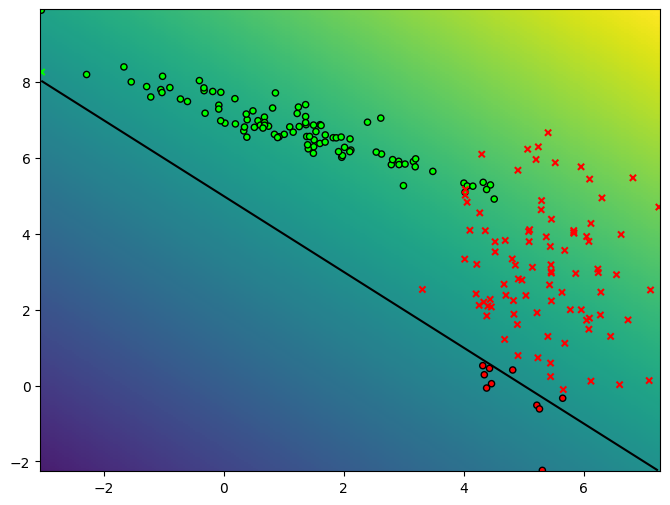

In [722]:
bbox=(np.min(X, axis=0), np.max(X, axis=0))
plt.figure(figsize=(8, 6)) 
graph_surface(myDummyDecision, bbox, offset=0)
graph_data(X, Y_, Y)
plt.show()

In [723]:
binlogreg_decfun = lambda w,b: lambda X: binlogreg_classify(X, w, b)

In [724]:
def binlogreg_decfun(w,b):
    def classify(X):
        return binlogreg_classify(X, w,b)
    return classify

(array([-3.0387883 , -2.23850871]), array([7.25595301, 9.90183553]))


C:\Users\Ivan\AppData\Local\Temp\ipykernel_25092\3980335596.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[incorrect, 0], X[incorrect, 1], c=colors[incorrect], marker='x',s=20, edgecolors='black')


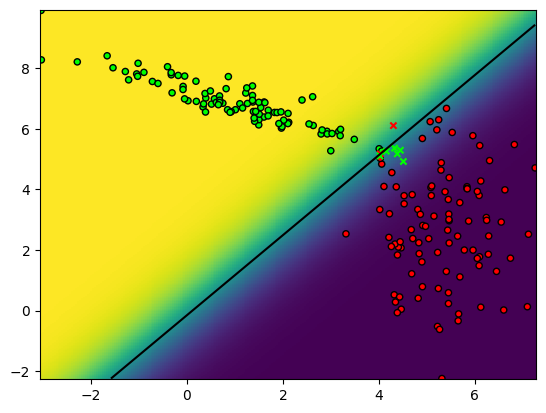

In [725]:
decfun = binlogreg_decfun(w,b)
Y = decfun(X) >= 0.5
Y = Y.astype(int).flatten()
bbox=(np.min(X, axis=0), np.max(X, axis=0))
print(bbox)
graph_surface(decfun, bbox, offset=0.5)

# graph the data points
graph_data(X, Y_, Y)

# show the plot
plt.show()

In [726]:
def class_to_onehot(Y):
  Yoh=np.zeros((len(Y),max(Y)+1))
  Yoh[range(len(Y)),Y] = 1
  return Yoh

def logreg_train(X, Y_, param_niter=100000):
    num_classes = len(np.unique(Y_))
    learning_rate = 0.01

    Y = class_to_onehot(Y_)

    if num_classes == 2:
        print("Binary classification")
        Y_ = Y_.flatten().reshape(-1,1)
        return binlogreg_train(X, Y_)
    
    else:
        W = np.random.randn(X.shape[1], num_classes)
        b = np.zeros((1, num_classes))

        for i in range(param_niter):
            # Compute scores and apply numerical stability trick
            scores = np.dot(X, W) + b
            #scores -= np.max(scores, axis=1, keepdims=True)  # Stability fix
            probs = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)
            logprobs = -np.log(probs + 1e-8)
            # Compute loss
            loss = -np.mean(Y * logprobs)

            if i % 10 == 0:
                print(f"Iter {i}; Loss {loss:.4f}")

            # Compute gradients
            dL_dscores = probs - Y

            grad_W = np.dot(X.T, dL_dscores) / X.shape[0]
            grad_b = np.sum(dL_dscores, axis=0, keepdims=True) / X.shape[0]

            # Update weights
            
            W -= learning_rate * grad_W
            b -= learning_rate * grad_b

        return W, b


In [727]:
def logreg_classify(X, W, b):
    scores = np.dot(X,W) + b
    probs = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)
    return probs

In [728]:
def eval_perf_multi(Y,Y_):
    acc = np.mean(Y == Y_)
    conf_matrix = np.zeros((len(np.unique(Y)), len(np.unique(Y_))))
    for y, y_ in zip(Y, Y_):
        conf_matrix[y, y_] += 1
    
    precisions = np.zeros(len(np.unique(Y)))
    recalls = np.zeros(len(np.unique(Y)))

    for i in range(len(np.unique(Y))):
        precisions[i] = conf_matrix[i,i] / np.sum(conf_matrix[i,:]) if np.sum(conf_matrix[i,:]) > 0 else 0
        recalls[i] = conf_matrix[i,i] / np.sum(conf_matrix[:,i]) if np.sum(conf_matrix[:,i]) > 0 else 0

    return acc, conf_matrix, precisions, recalls

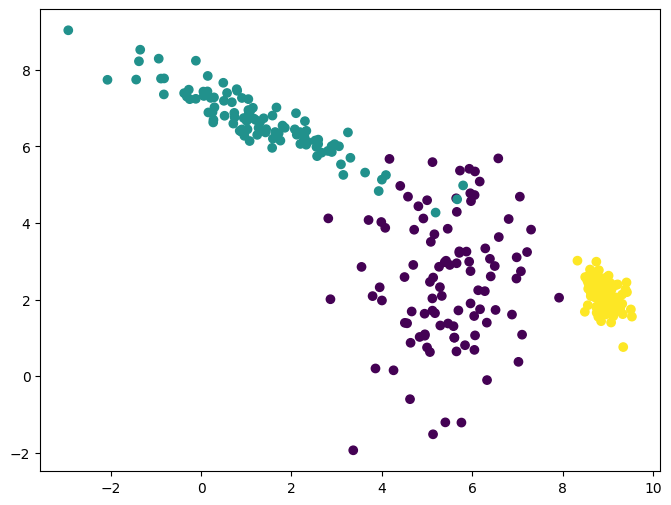

In [729]:
np.random.seed(100)
X_3, y_3 = sample_gauss_2d(3, 100)
y_3 = y_3.flatten()
plt.figure(figsize=(8, 6))
plt.scatter(X_3[:, 0], X_3[:, 1], c=y_3, cmap='viridis')
plt.show()

C:\Users\Ivan\AppData\Local\Temp\ipykernel_25092\3980335596.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[incorrect, 0], X[incorrect, 1], c=colors[incorrect], marker='x',s=20, edgecolors='black')


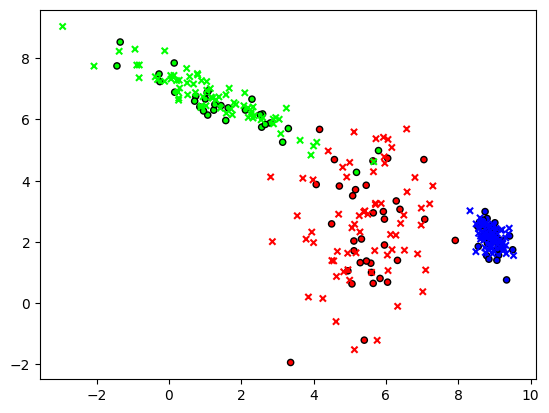

In [730]:
y3 = np.random.randint(0, 3, 300)
graph_data(X_3, y_3.flatten(), y3)

In [731]:
import sys

In [732]:
def logreg_decfun(W,b):
    def classify(X):
        return np.argmax(logreg_classify(X, W, b), axis=1)
    return classify

In [733]:
W,b = logreg_train(X_3, y_3)
probs = logreg_classify(X_3, W, b)
y3 = np.argmax(probs, axis=1)

accuracy, conf_mat, recall, precision = eval_perf_multi(y3, y_3)
print(conf_mat)
print (accuracy, recall, precision)

Iter 0; Loss -1.7481
Iter 10; Loss -1.4792
Iter 20; Loss -1.2222
Iter 30; Loss -0.9665
Iter 40; Loss -0.7259
Iter 50; Loss -0.5261
Iter 60; Loss -0.3889
Iter 70; Loss -0.3068
Iter 80; Loss -0.2577
Iter 90; Loss -0.2268
Iter 100; Loss -0.2062
Iter 110; Loss -0.1919
Iter 120; Loss -0.1814
Iter 130; Loss -0.1735
Iter 140; Loss -0.1673
Iter 150; Loss -0.1623
Iter 160; Loss -0.1583
Iter 170; Loss -0.1549
Iter 180; Loss -0.1521
Iter 190; Loss -0.1497
Iter 200; Loss -0.1476
Iter 210; Loss -0.1458
Iter 220; Loss -0.1442
Iter 230; Loss -0.1428
Iter 240; Loss -0.1416
Iter 250; Loss -0.1405
Iter 260; Loss -0.1395
Iter 270; Loss -0.1386
Iter 280; Loss -0.1378
Iter 290; Loss -0.1371
Iter 300; Loss -0.1364
Iter 310; Loss -0.1357
Iter 320; Loss -0.1352
Iter 330; Loss -0.1346
Iter 340; Loss -0.1341
Iter 350; Loss -0.1336
Iter 360; Loss -0.1332
Iter 370; Loss -0.1328
Iter 380; Loss -0.1323
Iter 390; Loss -0.1320
Iter 400; Loss -0.1316
Iter 410; Loss -0.1312
Iter 420; Loss -0.1309
Iter 430; Loss -0.1306

(array([-2.93735804, -1.93406606]), array([9.5312711 , 9.03545025]))


C:\Users\Ivan\AppData\Local\Temp\ipykernel_25092\3980335596.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[incorrect, 0], X[incorrect, 1], c=colors[incorrect], marker='x',s=20, edgecolors='black')


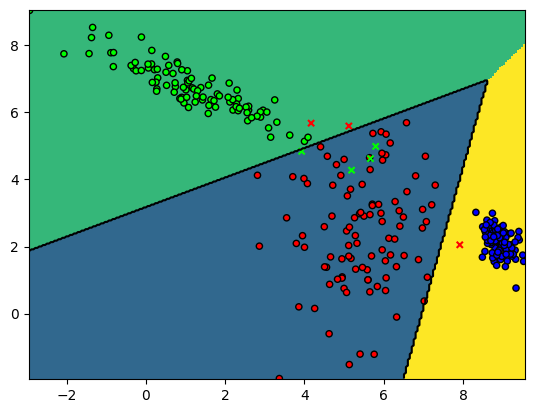

In [737]:
from time import sleep


func = logreg_decfun(W,b)
bbox=(np.min(X_3, axis=0), np.max(X_3, axis=0))
print(bbox)
#plt.figure(figsize=(8, 6))
graph_surface(func, bbox, offset=0.5)
graph_data(X_3, y_3, y3)
plt.show()